In [93]:
# Import data and necessary elements
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people # dataset of the faces, 
faces = fetch_lfw_people(min_faces_per_person=60)

# Import other necessary elements
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import RandomizedPCA
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# Function to plot the images:
def plot_images(data):
    fig, ax = plotter.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(62,47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=2)

# Make pipeline

In [96]:
# PCA and SVC
pca = RandomizedPCA(n_components= 50, random_state=2, whiten=True) # whiten = True -> to normalize the data

svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline
model = make_pipeline(pca, svc)

# Gridsearch

In [125]:
parameters = {'svc__C' : [1, 5, 10, 50], 
              'svc__gamma' : [0.0001, 0.0005, 0.001, 0.005]}

clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

new_model = clf.best_estimator_
print(clf.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [128]:
new_labels = new_model.predict(X_test)

#print(new_labels)

# Plotting the results

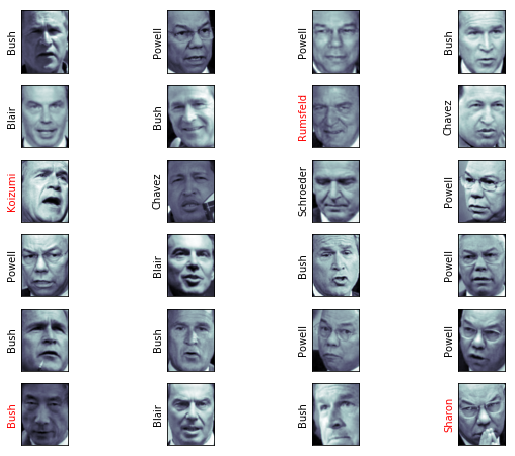

In [144]:
def plot_results(data, y_test):
    fig, ax = plotter.subplots(6, 4, figsize=(10, 8))
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(62,47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        if y_test[i] == new_labels[i]:
            axi.set_ylabel(faces.target_names[new_labels[i]].split()[-1], color = "black")
        else:
            axi.set_ylabel(faces.target_names[new_labels[i]].split()[-1], color = "red")

plot_results(X_test, y_test)
